In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('../input/google-play-store-apps/googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [25]:
x= df.Rating.mean()
df.Rating.fillna(x,inplace= True)
df.isnull().sum()



App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [36]:
df.Rating.max()
df[df.Rating>5]
#df.drop([10472],inplace= True)
df.Rating.max()


5.0

In [52]:
df["Installs"]= df.Installs.apply(lambda x: str(x).replace("+",""))
df["Installs"]= df.Installs.apply(lambda x: str(x).replace(",",""))
df["Installs"]= df.Installs.apply(lambda x: float(x))

df.Installs.dtype



dtype('float64')

In [53]:
df.Installs

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [60]:
df.Price.unique()
df["Price"]= df.Price.apply(lambda x:str(x).replace("$",""))
df["Price"]= df.Price.apply(lambda x: float(x))

df.Price.dtype


dtype('float64')

In [63]:
df.Reviews.unique()
df["Reviews"]= df.Price.apply(lambda x: int(x))

<AxesSubplot:ylabel='App'>

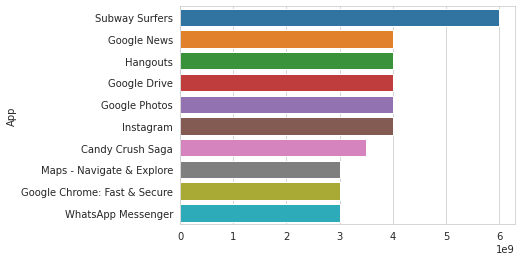

In [92]:
#Most installed apps
sns.set_style("whitegrid")
x= df.groupby("App").Installs.sum().sort_values(ascending= False).head(10)
sns.barplot(x.values,x.index)

<AxesSubplot:ylabel='App'>

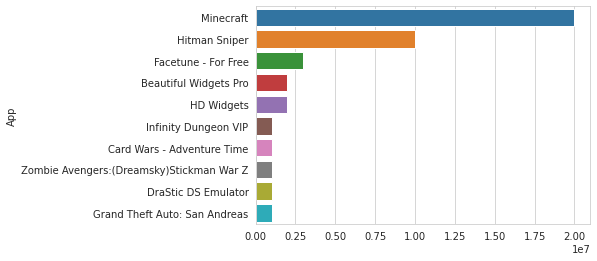

In [99]:
#Top paid apps
x= df[df["Type"]=="Paid"]
y= x.groupby("App").Installs.sum().sort_values(ascending= False).head(10)
sns.barplot(y.values,y.index)

Text(0.5, 0, 'Price')

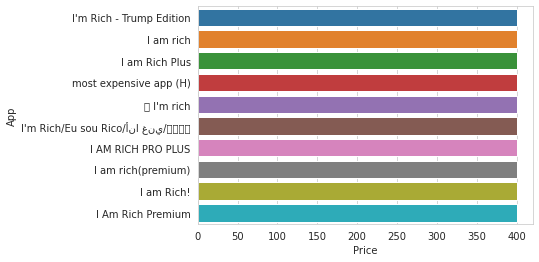

In [103]:
#Highest paid apps
x= df.groupby("App").Price.sum().sort_values(ascending= False).head(10)
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Price")

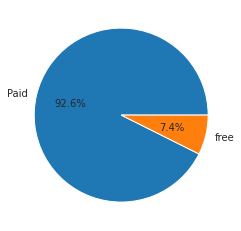

In [109]:
x= df.Type.value_counts()
label= ["Paid","free"]
plt.pie(x,labels= label,autopct= "%1.1f%%")
plt.show()

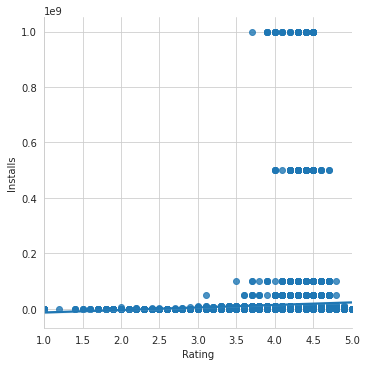

In [117]:
sns.lmplot(x="Rating",y="Installs",data= df)

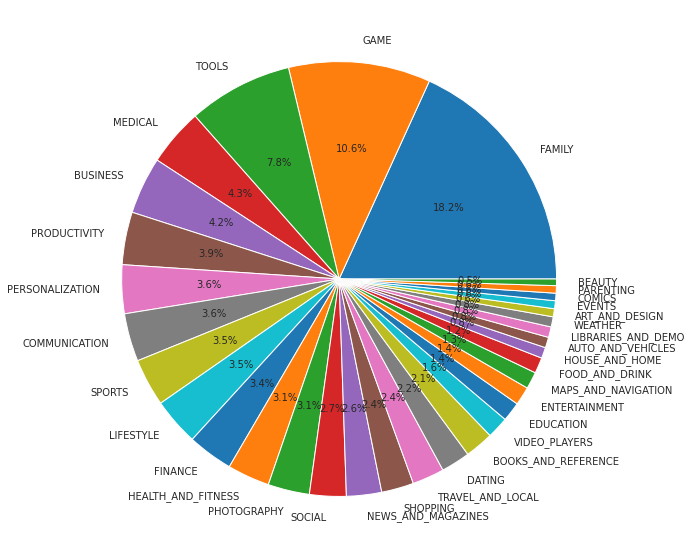

In [137]:
df.Category.unique()
x= df.Category.value_counts()
labels= list(x.index)
plt.figure(figsize= (10,10))
plt.pie(x,labels= labels,autopct= "%1.1f%%")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

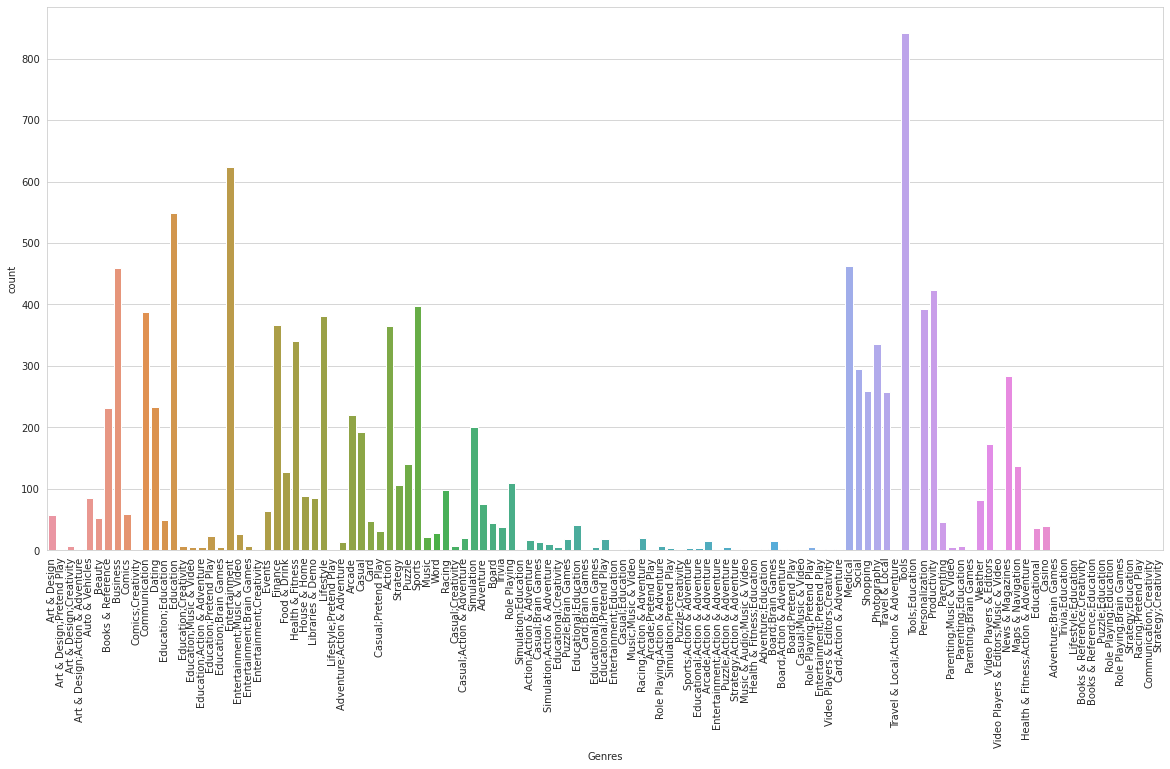

In [172]:
plt.figure(figsize= (20,10))
ax= sns.countplot(x= "Genres",data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show

In [139]:
#Top rated categories
df.groupby("Category").Rating.mean().sort_values(ascending= False).head(10)

Category
EDUCATION              4.387778
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311026
PERSONALIZATION        4.307603
GAME                   4.282506
PARENTING              4.282223
HEALTH_AND_FITNESS     4.266296
BEAUTY                 4.260882
SHOPPING               4.254052
Name: Rating, dtype: float64

In [140]:
#Top rated Genres
df.groupby("Genres").Rating.mean().sort_values(ascending= False).head(10)

Genres
Comics;Creativity              4.800000
Board;Pretend Play             4.800000
Health & Fitness;Education     4.700000
Puzzle;Education               4.600000
Adventure;Brain Games          4.600000
Strategy;Action & Adventure    4.600000
Entertainment;Creativity       4.533333
Music;Music & Video            4.533333
Tools;Education                4.500000
Strategy;Education             4.500000
Name: Rating, dtype: float64

In [141]:
#least rated categories
df.groupby("Category").Rating.mean().sort_values(ascending= False).tail(10)

Category
BUSINESS               4.145987
NEWS_AND_MAGAZINES     4.142993
FINANCE                4.139108
ENTERTAINMENT          4.126174
TRAVEL_AND_LOCAL       4.119716
LIFESTYLE              4.112427
VIDEO_PLAYERS          4.074858
TOOLS                  4.066280
MAPS_AND_NAVIGATION    4.065061
DATING                 4.007864
Name: Rating, dtype: float64

In [142]:
#least rated Genres
df.groupby("Genres").Rating.mean().sort_values(ascending= False).tail(10)

Genres
Role Playing;Pretend Play                4.020000
Dating                                   4.007864
Video Players & Editors;Music & Video    4.000000
Lifestyle;Pretend Play                   4.000000
Entertainment;Pretend Play               4.000000
Educational;Creativity                   3.960000
Educational                              3.915316
Art & Design;Pretend Play                3.900000
Health & Fitness;Action & Adventure      3.900000
Parenting;Brain Games                    3.800000
Name: Rating, dtype: float64

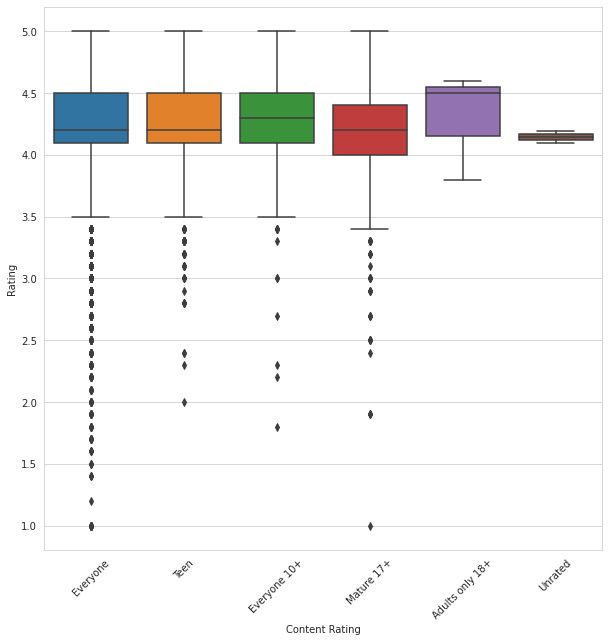

In [158]:
plt.figure(figsize= (10,10))
ax= sns.boxplot(x= "Content Rating",y= "Rating",data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

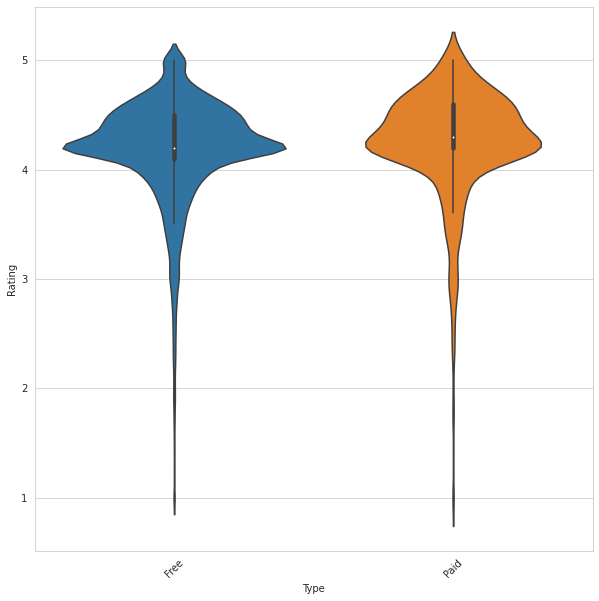

In [160]:
plt.figure(figsize= (10,10))
ax= sns.violinplot(x= "Type",y= "Rating",data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [164]:
#categories with most installs
df.groupby("Category").Installs.sum().sort_values(ascending=False).head(10)

Category
GAME                  3.508602e+10
COMMUNICATION         3.264728e+10
PRODUCTIVITY          1.417609e+10
SOCIAL                1.406987e+10
TOOLS                 1.145277e+10
FAMILY                1.025826e+10
PHOTOGRAPHY           1.008825e+10
NEWS_AND_MAGAZINES    7.496318e+09
TRAVEL_AND_LOCAL      6.868887e+09
VIDEO_PLAYERS         6.222003e+09
Name: Installs, dtype: float64